<a href="https://colab.research.google.com/github/hairymax/Python-for-science-lecture-notes/blob/main/04_SymPy/4.1.sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sympy : Символьная математика в Python

Этот ноутбук является переводом раздела [Sympy : Symbolic Mathematics in Python](https://scipy-lectures.org/packages/sympy.html) из онлайн-курса [scipy-lectures](https://scipy-lectures.org/)

**`SymPy`** - это библиотека Python для символьной математики. Она можеть стать альтернативой таким системам, как *Mathematica* или *Maple*, сохраняя при этом максимально простой и легко расширяемый код. `SymPy` написана полностью на Python и не требует никаких внешних библиотек.

Документацию по Sympy и пакеты для установки можно найти на официальном сайте http://www.sympy.org/

Возможности библиотеки
- Вычислять выражения с произвольной точностью.
- Выполнять алгебраические операции над символьными выражениями.
- Выполнять основные вычислительные операции с символьными выражениями (пределы, дифференцирование и интегрирование).
- Решать полиномиальные и трансцендентные уравнения.
- Решать некоторые дифференциальные уравнения.

In [1]:
import sympy as sym

## Первые шаги

### Использование SymPy в качестве калькулятора

В SymPy определены три числовых типа: `Real`, `Rational` и `Integer`.

Класс `Rational` представляет рациональное число как пару из двух `Integer`: числителя и знаменателя, поэтому `Rational(1, 2)` представляет дробь 1/2, `Rational(5, 2)` = 5/2 и так далее:

In [2]:
a = sym.Rational(1, 2)
a

1/2

In [3]:
a*2

1

SymPy работает на основе методов `mpmath`, что позволяет выполнять вычисления с использованием арифметики произвольной точности. Некоторые специальные константы, такие как $e$, $pi$, $\infty$ (бесконечность), рассматриваются как символы и могут быть вычислены с произвольной точностью:

In [4]:
sym.pi**2

pi**2

In [5]:
sym.pi.evalf()

3.14159265358979

In [6]:
(sym.pi + sym.exp(1)).evalf()

5.85987448204884

Метод `evalf` переводит выражение в число с плавающей точкой.

Существует также класс, представляющий бесконечность, который называется `oo`:

In [7]:
sym.oo > 99999

True

In [8]:
sym.oo + 1

oo

### Символы

В отличие от других систем компьютерной алгебры, в SymPy необходимо объявлять символьные переменные явно:

In [9]:
x = sym.Symbol('x')
y = sym.Symbol('y')

После этого с ними можно работать:

In [10]:
x + y + x - y

2*x

In [11]:
(x + y) ** 2

(x + y)**2

Cимвольными переменными можно манипулировать с помощью некоторых операторов python: 
- `+`, `-`, `*`, `**` (арифметические), 
- `&`, `|`, `~` , `>>`, `<<` (булевы).

**Печать**  
Sympy позволяет управлять отображением вывода. Здесь мы используем следующую настройку для печати:

In [12]:
sym.init_printing(use_unicode=True, wrap_line=True)

## Алгебраические преобразования
SymPy способен выполнять мощные алгебраические преобразования. Мы рассмотрим некоторые из наиболее часто используемых: разложение (expand) и упрощение (simplify)

### Expand

In [13]:
sym.expand((x + y) ** 3)

In [14]:
3 * x * y ** 2 + 3 * y * x ** 2 + x ** 3 + y ** 3

Дополнительные параметры могут быть указаны в форме по ключевым словам:

In [15]:
sym.expand(x + y, complex=True)

In [16]:
sym.I * sym.im(x) + sym.I * sym.im(y) + sym.re(x) + sym.re(y)

In [17]:
sym.expand(sym.cos(x + y), trig=True)

In [18]:
sym.cos(x) * sym.cos(y) - sym.sin(x) * sym.sin(y)

### Simplify
Преобразование выражения в более простую форму:

In [19]:
sym.simplify((x + x * y) / x)

Существуют альтернативы команде `simplify`, предназначенные для конкретных типов выражений: `powsimp` (для экспоненты), `trigsimp` (для тригонометрических выражений), `logcombine`, `radsimp`.

## Дифференциальное исчисление

## Пределы

Пределы в `SymPy` вычисляются командой `limit(function, variable, point)`   
Чтобы вычислить предел $f(x)$ при $x \rightarrow 0$, нужно вызвать `limit(f, x, 0)`:

In [20]:
sym.limit(sym.sin(x) / x, x, 0)

для $x \rightarrow \infty$

In [21]:
sym.limit(x, x, sym.oo)

In [22]:
sym.limit(1 / x, x, sym.oo)

In [23]:
sym.limit(x ** x, x, 0)

### Производные

Команда дифференцирования любого выражения в `SymPy` вызывается с помощью `diff(func, var)`.

In [24]:
sym.diff(sym.sin(x), x)

In [25]:
sym.diff(sym.sin(2 * x), x)

In [26]:
sym.diff(sym.tan(x), x)

Можем проверить, вычислив производную по определению через предел

In [27]:
sym.limit((sym.tan(x + y) - sym.tan(x)) / y, y, 0)

Производные более высокого порядка можно вычислить с помощью метода `diff(func, var, n)`:

In [28]:
sym.diff(sym.sin(2 * x), x, 1)

In [29]:
sym.diff(sym.sin(2 * x), x, 2)

In [30]:
sym.diff(sym.sin(2 * x), x, 3)

### Разложение в ряд

`SymPy` также умеет вычислять ряд Тейлора выражения в точке. Для этого используется `series(expr, var)`:

In [31]:
sym.series(sym.cos(x), x)

In [32]:
sym.series(1/sym.cos(x), x)

### Интегрирование

`SymPy` поддерживает вычисление неопределенных и определенных интегралов с помощью функции `integrate()`, которая использует мощный расширенный алгоритм Риша-Нормана и некоторые эвристики и сопоставление шаблонов. 

Интегрирование элементарных функций:

In [33]:
sym.integrate(6 * x ** 5, x)

In [34]:
sym.integrate(sym.sin(x), x)

In [35]:
sym.integrate(sym.log(x), x)

In [36]:
sym.integrate(2 * x + sym.sinh(x), x)

Специальные функции

In [37]:
sym.integrate(sym.exp(-x ** 2) * sym.erf(x), x)

Определенные интегралы:

In [38]:
sym.integrate(x**3, (x, -1, 1))

In [39]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

In [40]:
sym.integrate(sym.cos(x), (x, -sym.pi / 2, sym.pi / 2))

Несобственные интегралы:

In [41]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

In [42]:
sym.integrate(sym.exp(-x ** 2), (x, -sym.oo, sym.oo))

## Решение уравнений

`SymPy` способна решать алгебраические уравнения относительно в одной или нескольких переменных, используя функцию `solveset()`:

In [43]:
sym.solveset(x ** 4 - 1, x)

Этот метод принимает в качестве первого аргумента выражение, которое приравнивается к 0. Он также имеет (ограниченную) поддержку трансцендентных уравнений:

In [44]:
sym.solveset(sym.exp(x) + 1, x)

### Системы линейных уравнений

Sympy способен решать большую часть полиномиальных уравнений, а также уравнения с несколькими переменными. Для этого в команду `solve()` передаётся кортеж в качестве второго аргумента.

In [45]:
solution = sym.solve((x + 5 * y - 2, -3 * x + 6 * y - 15), (x, y))
solution[x], solution[y]

Альтернативный метод для полиномиальных уравнений - `factor`. Он возвращает многочлен, разложенный до неприводимых членов:

In [46]:
f = x ** 4 - 3 * x ** 2 + 1
sym.factor(f)

In [47]:
sym.factor(f, modulus=5)

`SymPy` также способен решать булевы уравнения, то есть определять, удовлетворяет ли определенное булево выражение условию или нет. Для этого мы используем функцию `satisfiable`:

In [48]:
sym.satisfiable(x & y)

{x: True, y: True}

Вывод функции говорит нам о том, что `(x & y)` истинно во всех случаях, когда `x` и `y` оба истинны. Если выражение не может быть истинным, т.е. никакие значения его аргументов не могут сделать выражение истинным, оно возвращает `False`:

In [49]:
sym.satisfiable(x & ~x)

False

## Линейная алгебра

### Матрицы

Матрицы создаются как экземпляры класса `Matrix`

In [50]:
sym.Matrix([[1, 0], [0, 1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

В отличие от массива NumPy, в него можно помещать символы:

In [51]:
x, y = sym.symbols('x, y')
A = sym.Matrix([[1, x], [y, 1]])
B = A**2
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [52]:
B

⎡x⋅y + 1    2⋅x  ⎤
⎢                ⎥
⎣  2⋅y    x⋅y + 1⎦

In [53]:
A - B

⎡-x⋅y   -x ⎤
⎢          ⎥
⎣ -y   -x⋅y⎦

### Дифференциальные уравнения

SymPy способен решать (некоторые) обыкновенные дифференциальные уравнения. Для решения дифференциальных уравнений используется `dsolve`. Сначала необходимо создать неопределенную функцию, передав `cls=Function` в функцию `symbols`:

In [54]:
f, g = sym.symbols('f g', cls=sym.Function)

`f` и `g` теперь являются неопределенными функциями. Мы можем вызвать `f(x)`:

In [55]:
f(x)

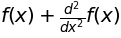

In [56]:
f(x).diff(x, x) + f(x)

In [57]:
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Этой функции можно передать аргументы в виде ключевых слов, чтобы помочь найти наилучшую систему решения.  
Например, если вы знаете, что уравнение является уравнением с разделяемыми переменными, можно использовать ключевое слово `hint='separable'`, чтобы заставить `dsolve` решить его как разделяемое уравнение:

In [58]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable')

## **Упражнения**

1. Вычислите $\sqrt{2}$ с точностью до 100 знаков после запятой.
2. Вычислите $1/2 + 1/3$ в рациональном виде.
3. Представьте выражение $(x+y)^6$ в виде многочлена.
4. Упростите тригонометрическое выражение $\frac{\sin(x)}{\cos(x)}$
5. Вычислите $$\lim_{x\rightarrow 0} \frac{\sin(x)}{x}$$
6. Вычислите производную $log(x)$ по $x$.
7. Решите систему уравнений $$x + y = 2,\\ 2\cdot x + y = 0$$
8. Существуют ли булевы значения `x`, `y`, которые делают выражение `(~x | y) & (~y | x)` истинными?
9. Решите дифференциальное уравнение Бернулли $$x \frac{d f(x)}{x} + f(x) - f(x)^2=0$$
10. Решите то же уравнение, используя `hint='Bernoulli'`. В чём разница?